10_17をきれいに書き直したもの。
出現頻度（構成比）が一定以下のものを取り除く。
また、品詞ごと、支持率変化月ごとに混合行列を表示する。
一定の閾値以下のものは表示していない。

In [1]:
import pandas as pd 
import numpy as np
import sklearn
import seaborn as sns
# import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfTransformer
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [2]:
mdf=pd.read_csv('./末尾_file毎.csv', engine='python')
kdf=pd.read_csv('./形容詞_file毎.csv', engine='python')

In [3]:
MONTH_LIST=['翌月','当月','前月']
WORD_LIST=['先行','一致','遅行']
LABEL_NAME=['支持率上昇','支持率降下']
CLASIFFIER={'RandomForest':RandomForestClassifier(random_state=1),
                    'NB':MultinomialNB()}
DF_LIST={'形容詞':kdf,
                '末尾表現':mdf}

USE_PERCENTS=[0.001,0.0004,0.0001,0.00001]


In [26]:
def preproDF(df,word,PERCENT):
    fdf=pd.DataFrame()
    fdf=df.loc[:,df.columns.str.contains(word)]
    fdf['sum_word']=fdf.sum(axis=1).astype(int)
    fdf=fdf.sort_values('sum_word',ascending=False)
    fdf['kouseihi']=fdf['sum_word']/fdf['sum_word'].sum()
    fdf['ruisekihi']=fdf['sum_word'].cumsum()/fdf['sum_word'].sum()

    fdf=fdf.reset_index(drop=True)
    fdf=fdf[fdf['kouseihi']>PERCENT]
    fdf.drop(columns=['sum_word','kouseihi','ruisekihi'],inplace=True)
    fdf=fdf.T

    fdf['label']=1
    fdf.loc[fdf.index.str.contains(word+'減'),'label']=0
    
    target=fdf['label']
    fdf=fdf.drop(columns=['label'])
#     fdf=fdf.reset_index(drop=True)
    return(fdf,target)

def preproDF2(df,word,PERCENT):
    fdf=pd.DataFrame()
    fdf=df.loc[:,((df.columns.str.contains(word))|(df.columns.str.contains('Unnamed: 0')))]
    
    fdf['sum_word']=fdf.sum(axis=1).astype(int)
    fdf=fdf.sort_values('sum_word',ascending=False)
    fdf['kouseihi']=fdf['sum_word']/fdf['sum_word'].sum()
    fdf['ruisekihi']=fdf['sum_word'].cumsum()/fdf['sum_word'].sum()

    fdf=fdf.reset_index(drop=True)
    fdf=fdf[fdf['kouseihi']>PERCENT]
    
    wordcouttdf=fdf[['Unnamed: 0','sum_word','kouseihi','ruisekihi']]
    fdf.drop(columns=['Unnamed: 0','sum_word','kouseihi','ruisekihi'],inplace=True)

    fdf=fdf.T
    wordcouttdf=wordcouttdf.T

    fdf['label']=1
    fdf.loc[fdf.index.str.contains(word+'減'),'label']=0
    
    target=fdf['label']
    fdf=fdf.drop(columns=['label'])
#     fdf=fdf.reset_index(drop=True)
    return(fdf,target,wordcouttdf)


In [47]:
df,y,word_df=preproDF2(mdf,'先行',0.0004)
X=df.values
Y=y.values
CLF=RandomForestClassifier(random_state=1)
CLF.fit(X,Y)
y_pred=cross_val_predict(CLF,X,Y,cv=50)

fti = CLF.feature_importances_   
word_df.loc['feature_importance']=fti
word_df=word_df.T
word_df=word_df.sort_values('feature_importance',ascending=False)
word_df.head(50)

,Unnamed: 0,sum_word,kouseihi,ruisekihi,feature_importance
36,ないですか,177,0.0026684,0.673416,0.0632484
51,んですから,126,0.00189954,0.706341,0.045211
8,いただきました,757,0.0114123,0.533574,0.0422042
115,ありますよ,43,0.000648254,0.776398,0.0354144
1,であります,7513,0.113264,0.268769,0.0351897
13,ではありません,482,0.00726648,0.57577,0.0302424
6,ありました,1477,0.0222668,0.501613,0.02658
16,があります,424,0.00639209,0.595761,0.0236931
32,はないか,200,0.00301514,0.661943,0.02308
9,ございました,680,0.0102515,0.543825,0.0205509


In [42]:
word_df

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
Unnamed: 0,ております,であります,でございます,と思います,ています,てまいります,ありました,に思います,いただきました,ございました,...,に取り組みます,てあります,ございますが,いるでしょう,であろう,記憶します,ができます,ましたね,はい,かわからない
sum_word,10315,7513,5734,3994,2429,1811,1477,1363,757,680,...,29,29,28,28,28,27,27,27,27,27
kouseihi,0.155506,0.113264,0.0864439,0.0602123,0.0366188,0.0273021,0.0222668,0.0205482,0.0114123,0.0102515,...,0.000437195,0.000437195,0.000422119,0.000422119,0.000422119,0.000407043,0.000407043,0.000407043,0.000407043,0.000407043
ruisekihi,0.155506,0.268769,0.355213,0.415425,0.452044,0.479346,0.501613,0.522161,0.533574,0.543825,...,0.79871,0.799147,0.799569,0.799991,0.800413,0.80082,0.801227,0.801634,0.802041,0.802448
feature_importance,0.00260294,0.0351897,0.0157138,0.0112001,0.00573802,0.00176806,0.02658,0.0107589,0.0422042,0.0205509,...,0,0.00452107,0.00291626,0,0,0.00427164,0,0.0025453,0.00322713,0


0.001の形容詞でNBを使用。翌月
要素数は(118, 69)
              precision    recall  f1-score   support

       支持率上昇       0.67      0.66      0.66        61
       支持率降下       0.64      0.65      0.64        57

   micro avg       0.65      0.65      0.65       118
   macro avg       0.65      0.65      0.65       118
weighted avg       0.65      0.65      0.65       118



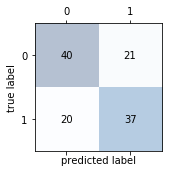


0.001の末尾表現でRandomForestを使用。翌月
要素数は(118, 86)
              precision    recall  f1-score   support

       支持率上昇       0.64      0.82      0.72        61
       支持率降下       0.72      0.51      0.60        57

   micro avg       0.67      0.67      0.67       118
   macro avg       0.68      0.66      0.66       118
weighted avg       0.68      0.67      0.66       118



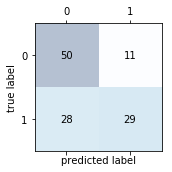


0.0004の形容詞でNBを使用。翌月
要素数は(118, 107)
              precision    recall  f1-score   support

       支持率上昇       0.68      0.62      0.65        61
       支持率降下       0.63      0.68      0.66        57

   micro avg       0.65      0.65      0.65       118
   macro avg       0.65      0.65      0.65       118
weighted avg       0.65      0.65      0.65       118



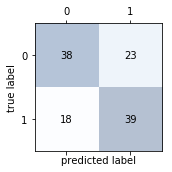


0.0004の末尾表現でRandomForestを使用。翌月
要素数は(118, 167)
              precision    recall  f1-score   support

       支持率上昇       0.70      0.85      0.77        61
       支持率降下       0.80      0.61      0.69        57

   micro avg       0.74      0.74      0.74       118
   macro avg       0.75      0.73      0.73       118
weighted avg       0.75      0.74      0.73       118



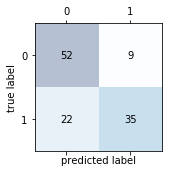


0.0001の形容詞でNBを使用。翌月
要素数は(118, 197)
              precision    recall  f1-score   support

       支持率上昇       0.71      0.64      0.67        61
       支持率降下       0.65      0.72      0.68        57

   micro avg       0.68      0.68      0.68       118
   macro avg       0.68      0.68      0.68       118
weighted avg       0.68      0.68      0.68       118



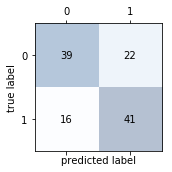


1e-05の形容詞でNBを使用。翌月
要素数は(118, 271)
              precision    recall  f1-score   support

       支持率上昇       0.71      0.64      0.67        61
       支持率降下       0.65      0.72      0.68        57

   micro avg       0.68      0.68      0.68       118
   macro avg       0.68      0.68      0.68       118
weighted avg       0.68      0.68      0.68       118



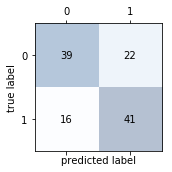

In [30]:
threshold=0.65
for PERCENT in USE_PERCENTS:
    for DFN,DF in DF_LIST.items():
        for MONTH,WORD in zip(MONTH_LIST,WORD_LIST):
            df,y,word_df=preproDF2(DF,WORD,PERCENT)

            for CLFN,CLF in CLASIFFIER.items():
                X=df.values
                Y=y.values
                CLF.fit(X,Y)
                y_pred=cross_val_predict(CLF,X,Y,cv=50)
                if f1_score(Y,y_pred,average='micro')>threshold:
#                     print(f1_score(Y,y_pred,average='micro'))
                    print(f'{PERCENT}の{DFN}で{CLFN}を使用。{MONTH}')
                    print(f'要素数は{df.shape}')
                    confmat(Y,y_pred,LABEL_NAME)
#                     print(word_df.loc['Unnamed: 0',:])
                    print()

In [20]:

def ML(df,y):
    clf = MultinomialNB()
    clf2 = RandomForestClassifier()
    
    tfidf=TfidfTransformer(use_idf=True,norm='l2',smooth_idf=True)
    x=tfidf.fit_transform(df.values)
    
    print()
    
    y_pred=cross_val_score(clf,df.values, y.values,cv=50)
    y_pred2=cross_val_score(clf2,df.values, y.values,cv=50)
    
    tfy_pred=cross_val_score(clf,x, y.values,cv=50)
    tfy_pred2=cross_val_score(clf2,x, y.values,cv=50)
    
    print(df.shape,(y_pred.mean()*100).round(1),(y_pred2.mean()*100).round(1),(tfy_pred.mean()*100).round(1),(tfy_pred2.mean()*100).round(1))
    
def confmat(y_values,y_pred,target_name,threshold=0.65):
    if f1_score(y_values,y_pred,average='micro')>threshold:
        print (classification_report(y_values,y_pred,target_names=target_name)) 
        confmat=confusion_matrix(y_true=y_values,y_pred=y_pred)
        fig,ax=plt.subplots(figsize=(2.5,2.5))
        ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
        for i in range(confmat.shape[0]):
            for j in range(confmat.shape[1]):
                ax.text(x=j,y=i,s=confmat[i,j],va='center',ha='center')
        plt.xlabel('predicted label')       
        plt.ylabel('true label')     
        plt.tight_layout()
        plt.show()

In [15]:
#形容詞と末尾を足し合わせたもの
threshold=0.6
for PERCENT in USE_PERCENTS:
    for MONTH,WORD in zip(MONTH_LIST,WORD_LIST):
        for i,(DFN,DF) in enumerate(DF_LIST.items()):
            if i==0:
                df,y=preproDF(DF,WORD,PERCENT)
            else:
                df2,y=preproDF(DF,WORD,PERCENT)
                
        df=pd.concat([df,df2],keys=['k','m'],axis=1)        
        for CLFN,CLF in CLASIFFIER.items():
            X=df.values
            Y=y.values
            CLF.fit(X,Y)
            y_pred=cross_val_predict(CLF,X,Y,cv=50)
            if f1_score(Y,y_pred,average='micro')>threshold:
#                     print(f1_score(Y,y_pred,average='micro'))
                print(f'{PERCENT}の末尾＋形容詞で{CLFN}を使用。{MONTH}')
                print(f'要素数は{df.shape}')
                confmat(Y,y_pred,LABEL_NAME)
                print()

ValueError: Mix type of y not allowed, got types {'continuous', 'binary'}